<a href="https://colab.research.google.com/github/veeralakrishna/Utilities/blob/master/Plotly/06_PM_Trace_Explorer_v1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>ProcessMining</center></h1>

In [ ]:
pip install pm4py

     |████████████████████████████████| 1.8 MB 7.8 MB/s 
  Created wheel for pyvis: filename=pyvis-0.2.1-py3-none-any.whl size=23688 sha256=b7f611c424cb4aea9d101ffa82604b2a75874b49899ce9098a41e9b33b7e4d36
  Stored in directory: /root/.cache/pip/wheels/2a/8f/04/6340d46afc74f59cc857a594ca1a2a14a1f4cbd4fd6c2e9306
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23606 sha256=e3c18125c509fd08a8cbaf7aa9a41a2aad2f6032c3d7893697db5432599c9e98
  Stored in directory: /root/.cache/pip/wheels/d7/9c/d4/63bc3d8931de0980b9e4a724dea290bb40b8b1b2bd6227c8da
Successfully built pyvis stringdist


In [ ]:
import pandas as pd
import numpy as np
import itertools

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch


import pm4py
from pm4py.util import constants
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
from pm4py.algo.filtering.log.attributes import attributes_filter
from pm4py.statistics.traces.generic.log import case_statistics
from pm4py.algo.filtering.log.attributes import attributes_filter
from pm4py.visualization.graphs import visualizer as graphs_visualizer
from pm4py.algo.discovery.correlation_mining import algorithm as correlation_miner


pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
df = pd.read_csv("processmining.csv")

In [ ]:
len(df.CLAIM_ID.unique())

85

In [ ]:
df['CREATE_DATE'] = pd.to_datetime(df['CREATE_DATE'], format="%d-%b-%y")

df['COMPLETION_DATE'] = pd.to_datetime(df['COMPLETION_DATE'], format="%d-%b-%y")

In [ ]:
df.sort_values(by='CREATE_DATE', inplace=True)

<h1><center> Trace Explorer</center></h1>


Different activity sequences in the event log can be visualized with the **trace_explorer**. It can be used to explore frequent as well as infrequent traces.

In [ ]:
# ------------------------------------------------------------------------------
#                                Utilities
# ------------------------------------------------------------------------------


# ------------------------------------------------------------------------------
#                                   Color Maps
#                           https://carto.com/carto-colors/
# ------------------------------------------------------------------------------

# Color Themes
pastel = "#66C5CC,#F6CF71,#F89C74,#DCB0F2,#87C55F,#9EB9F3,#FE88B1,#C9DB74,#8BE0A4,#B497E7,#D3B484,#B3B3B3"
temps = "#009392,#39b185,#9ccb86,#e9e29c,#eeb479,#e88471,#cf597e"
geyser = "#008080,#70a494,#b4c8a8,#f6edbd,#edbb8a,#de8a5a,#ca562c"
earth = "#A16928,#bd925a,#d6bd8d,#edeac2,#b5c8b8,#79a7ac,#2887a1"
tropic = "#009B9E,#42B7B9,#A7D3D4,#F1F1F1,#E4C1D9,#D691C1,#C75DAB"
fall = "#3d5941,#778868,#b5b991,#f6edbd,#edbb8a,#de8a5a,#ca562c"
armyRose = "#798234,#a3ad62,#d0d3a2,#fdfbe4,#f0c6c3,#df91a3,#d46780"
tealRose = "#009392,#72aaa1,#b1c7b3,#f1eac8,#e5b9ad,#d98994,#d0587e"
orYel = "#ecda9a,#efc47e,#f3ad6a,#f7945d,#f97b57,#f66356,#ee4d5a"
sunset = "#f3e79b,#fac484,#f8a07e,#eb7f86,#ce6693,#a059a0,#5c53a5"
sunsetDark = "#fcde9c,#faa476,#f0746e,#e34f6f,#dc3977,#b9257a,#7c1d6f"
tealGrn = "#b0f2bc,#89e8ac,#67dba5,#4cc8a3,#38b2a3,#2c98a0,#257d98"
peach = "#fde0c5,#facba6,#f8b58b,#f59e72,#f2855d,#ef6a4c,#eb4a40"
pinkYel = "#fef6b5,#ffdd9a,#ffc285,#ffa679,#fa8a76,#f16d7a,#e15383"
redOr = "#f6d2a9,#f5b78e,#f19c7c,#ea8171,#dd686c,#ca5268,#b13f64"
burgYl = "#fbe6c5,#f5ba98,#ee8a82,#dc7176,#c8586c,#9c3f5d,#70284a"
bluYl = "#f7feae,#b7e6a5,#7ccba2,#46aea0,#089099,#00718b,#045275"
bluGrn = "#c4e6c3,#96d2a4,#6dbc90,#4da284,#36877a,#266b6e,#1d4f60"
teal = "#d1eeea,#a8dbd9,#85c4c9,#68abb8,#4f90a6,#3b738f,#2a5674"
bold = "#7F3C8D,#11A579,#3969AC,#F2B701,#E73F74,#80BA5A,#E68310,#008695,#CF1C90,#f97b72,#4b4b8f,#A5AA99"
antique = "#855C75,#D9AF6B,#AF6458,#736F4C,#526A83,#625377,#68855C,#9C9C5E,#A06177,#8C785D,#467378,#7C7C7C"
prism = "#5F4690,#1D6996,#38A6A5,#0F8554,#73AF48,#EDAD08,#E17C05,#CC503E,#94346E,#6F4070,#994E95,#666666"
vivid = "#E58606,#5D69B1,#52BCA3,#99C945,#CC61B0,#24796C,#DAA51B,#2F8AC4,#764E9F,#ED645A,#CC3A8E,#A5AA99"
safe = "#88CCEE,#CC6677,#DDCC77,#117733,#332288,#AA4499,#44AA99,#999933,#882255,#661100,#6699CC,#888888"

theme_mix = [pastel,
             temps,
             geyser,
             earth,
             tropic,
             fall,
             armyRose,
             tealRose,
             orYel,
             sunset,
             sunsetDark,
             tealGrn,
             peach,
             pinkYel,
             redOr,
             burgYl,
             bluYl,
             bluGrn,
             teal,
             bold,
             antique,
             prism,
             vivid,
             safe]

color_map_2d_list = []

for i in theme_mix:
    color_map_2d_list.append(i.split(","))

colors_hex_list = list(itertools.chain.from_iterable(color_map_2d_list))


# ------------------------------------------------------------------------------
#                                Get Traces
# ------------------------------------------------------------------------------

def get_traces_from_df(df,
                       case,
                       create_dt,
                       activity,
                       ntraces=10,
                       colors_hex_list=colors_hex_list,
                       allow_duplicate_traces=False,
                       traces_acronym = "Upper Case Letters",
                       n_chars=8):

    """
    Function to get traces from events

    Events = case+timestamp+activity

    Params:
        df(a dataframe)         : pandas dataframe
        case(str)               : Unique case ID column name(Ex: Claims ID)
        create_dt(str)          : Activity create date column(Ex: Create Date)
        activity(str)           : Activity column name(Ex: Task)
        ntraces(int)            : Number traces to plot(rows), default 10
        colors_hex_list(list)   : List of hex colors
        allow_duplicate_traces  : A boolean to include/exculde duplicate traces in row
        fig_height(int)         : figure height
        traces_acronym(str)     : Generate acronym with the selection
                                    ["Upper Case Characters", "First N Characters",
                                    "First Character in Str"]
        n_chars(int)          : Number of characters

    Returns:
        None

        Displays a plotly interactive plot

    """

    # Make a copy of original dataframe
    data = df.copy()

    data.sort_values(by=create_dt, inplace=True)


    if traces_acronym == "Upper Case Characters":
        # Extract acronym from activity
        data["Acronym"] = data[activity].apply(lambda x: ''.join([c for c in x if c.isupper()]))

    elif traces_acronym == "First N Characters":
        data["Acronym"] = data[activity].str[:n_chars]

    elif traces_acronym == "First Character in Str":
        data["Acronym"] = data[activity].str.split(expand=True).apply(lambda x : x.str[0]).fillna('').sum(1)
        data["Acronym"] = data["Acronym"].str.replace('\W', '', regex=True)



    # Groupby cases/id's with agg acronym as list
    traces = data.groupby(case).agg(Traces=('Acronym', list))
    # Reset index
    traces.reset_index(inplace=True)

    if not allow_duplicate_traces:
        # Remove duplicate traces
        traces['Traces'] = traces['Traces'].apply(lambda x: sorted(set(x), key=x.index))

    # Get value counts with count & percentage
    trace_vc = pd.concat([traces['Traces'].value_counts(),
                          traces['Traces'].value_counts(normalize=True).mul(100)],
                         axis=1,
                         keys=('Counts','Percentage'))
    # Rename axis with Trace
    trace_vc = trace_vc.rename_axis('Trace').reset_index()
    # Get ntraces
    trace_df = trace_vc.head(ntraces)
    # Create a dict with trace & percentage
    data_dict = {"Trace": list(trace_df["Trace"]),
                 "Percentage" : list(trace_df["Percentage"].round(3))}
    # Get unique count of acronym
    accr = list(data.Acronym.unique())

    # Create a colormap
    color_map = dict(zip(accr,colors_hex_list[:len(accr)]))

    # get unique acronym & activity key, value pairs
    acronym = dict(zip(data.Acronym, data[activity]))


    return data_dict, color_map, acronym, trace_df

<h1><center> Trace Explorer - Matplotlib Implementation</center></h1>

In [ ]:
# import required packages
import math
import random
import itertools

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import ListedColormap




def generate_colormap(number_of_distinct_colors: int = 80):
    """
    Generates colormap with distinct colors

    params:
    ---------
    number_of_distinct_colors : required distict colors in int

    returns:
    ----------
    returns colomap object with required distinct colors
    """
    if number_of_distinct_colors == 0:
        number_of_distinct_colors = 80

    number_of_shades = 7
    number_of_distinct_colors_with_multiply_of_shades = int(math.ceil(number_of_distinct_colors / number_of_shades) * number_of_shades)

    # Create an array with uniformly drawn floats taken from <0, 1) partition
    linearly_distributed_nums = np.arange(number_of_distinct_colors_with_multiply_of_shades) / number_of_distinct_colors_with_multiply_of_shades

    # We are going to reorganise monotonically growing numbers in such way that there will be single array with saw-like pattern
    #     but each saw tooth is slightly higher than the one before
    # First divide linearly_distributed_nums into number_of_shades sub-arrays containing linearly distributed numbers
    arr_by_shade_rows = linearly_distributed_nums.reshape(number_of_shades, number_of_distinct_colors_with_multiply_of_shades // number_of_shades)

    # Transpose the above matrix (columns become rows) - as a result each row contains saw tooth with values slightly higher than row above
    arr_by_shade_columns = arr_by_shade_rows.T

    # Keep number of saw teeth for later
    number_of_partitions = arr_by_shade_columns.shape[0]

    # Flatten the above matrix - join each row into single array
    nums_distributed_like_rising_saw = arr_by_shade_columns.reshape(-1)

    # HSV colour map is cyclic (https://matplotlib.org/tutorials/colors/colormaps.html#cyclic), we'll use this property
    hsv = plt.cm.get_cmap('hsv')
    initial_cm = hsv(nums_distributed_like_rising_saw)

    lower_partitions_half = number_of_partitions // 2
    upper_partitions_half = number_of_partitions - lower_partitions_half

    # Modify lower half in such way that colours towards beginning of partition are darker
    # First colours are affected more, colours closer to the middle are affected less
    lower_half = lower_partitions_half * number_of_shades
    for i in range(3):
        initial_cm[0:lower_half, i] *= np.arange(0.2, 1, 0.8/lower_half)

    # Modify second half in such way that colours towards end of partition are less intense and brighter
    # Colours closer to the middle are affected less, colours closer to the end are affected more
    for i in range(3):
        for j in range(upper_partitions_half):
            modifier = np.ones(number_of_shades) - initial_cm[lower_half + j * number_of_shades: lower_half + (j + 1) * number_of_shades, i]
            modifier = j * modifier / upper_partitions_half
            initial_cm[lower_half + j * number_of_shades: lower_half + (j + 1) * number_of_shades, i] += modifier

    return ListedColormap(initial_cm)




def plot_trace_explorer(data, case, create_dt, activity, ntraces=10, allow_duplicate_traces=False):

    df = data.copy()

    data_dict, _, mapper, trace_df = get_traces_from_df(df,
                                                        case,
                                                        create_dt,
                                                        activity,
                                                        ntraces=ntraces,
                                                        allow_duplicate_traces=allow_duplicate_traces)


    max_len = list(len(subl) for subl in data_dict['Trace'])

    list2d = list(trace_df["Trace"])
    merged = list(set(itertools.chain(*list2d)))

    mapper_filtered = dict((k, mapper[k]) for k in merged)

    # https://matplotlib.org/stable/tutorials/colors/colormaps.html
    # cmaps - plasma, rainbow, autumn, spring, nipy_spectral, hsv
    # cmap = plt.cm.get_cmap('rainbow')
    cmap = generate_colormap(20)
    color_dict = {acr: cmap((i+2.5) / (len(mapper_filtered) + 1)) for i, acr in enumerate(mapper_filtered)}

    fig, ax = plt.subplots(figsize=(18, 10))
    percentage_position = max(len(t) for t in data_dict["Trace"]) + 1.1
    for row, (trace, percentage) in enumerate(zip(data_dict["Trace"], data_dict["Percentage"]), start=1):
        for col, acr in enumerate(trace, start=1):
            ax.add_patch(plt.Rectangle((col - 0.5, row - 0.45), 1, 0.9, facecolor=color_dict[acr], edgecolor='black'))
            ax.text(col, row, acr, ha='center', va='center')
        ax.add_patch(plt.Rectangle((percentage_position - 0.5, row - 0.45), 1, 0.9, facecolor='grey', edgecolor='white'))
        ax.text(percentage_position, row, f'{percentage:.2f}%', ha='center', va='center', color='white')


    new_patches = []
    for patch in reversed(ax.patches):
        bb = patch.get_bbox()
        color=patch.get_facecolor()
        p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                            abs(bb.width), abs(bb.height),
                            boxstyle="round,pad=-0.0440,rounding_size=0.055",
                            ec="none", fc=color,
                            mutation_aspect=4
                            )
        patch.remove()
        new_patches.append(p_bbox)
    for patch in new_patches:
        ax.add_patch(patch)

    ax.set_xlim(0.5, percentage_position + 0.5)
    ax.set_xticks(range(1, int(percentage_position)))
    ax.set_ylim(len(data_dict["Trace"]) + 0.45, 0.55) # y-axis is reversed
    ax.set_yticks([])
    handles = [plt.Rectangle((0, 0), 0, 0, facecolor=color_dict[acr], edgecolor='black', label=mapper_filtered[acr])
            for acr in mapper_filtered]
    ax.legend(handles=handles, bbox_to_anchor=[1.02, 1.02], loc='upper left')
    for dir in ['left', 'right', 'top']:
        ax.spines[dir].set_visible(False)

    # Decorations
    # Lighten borders
    plt.gca().spines["top"].set_alpha(.3)
    plt.gca().spines["bottom"].set_alpha(.3)
    plt.gca().spines["right"].set_alpha(.3)
    plt.gca().spines["left"].set_alpha(.3)

    plt.grid(linestyle='--', alpha=0.5)

    plt.title('Trace Explorer', fontdict={'size':14})


    plt.grid(linestyle='--', axis='both', alpha=0.5)
    plt.tight_layout()
    plt.show()

    return data_dict


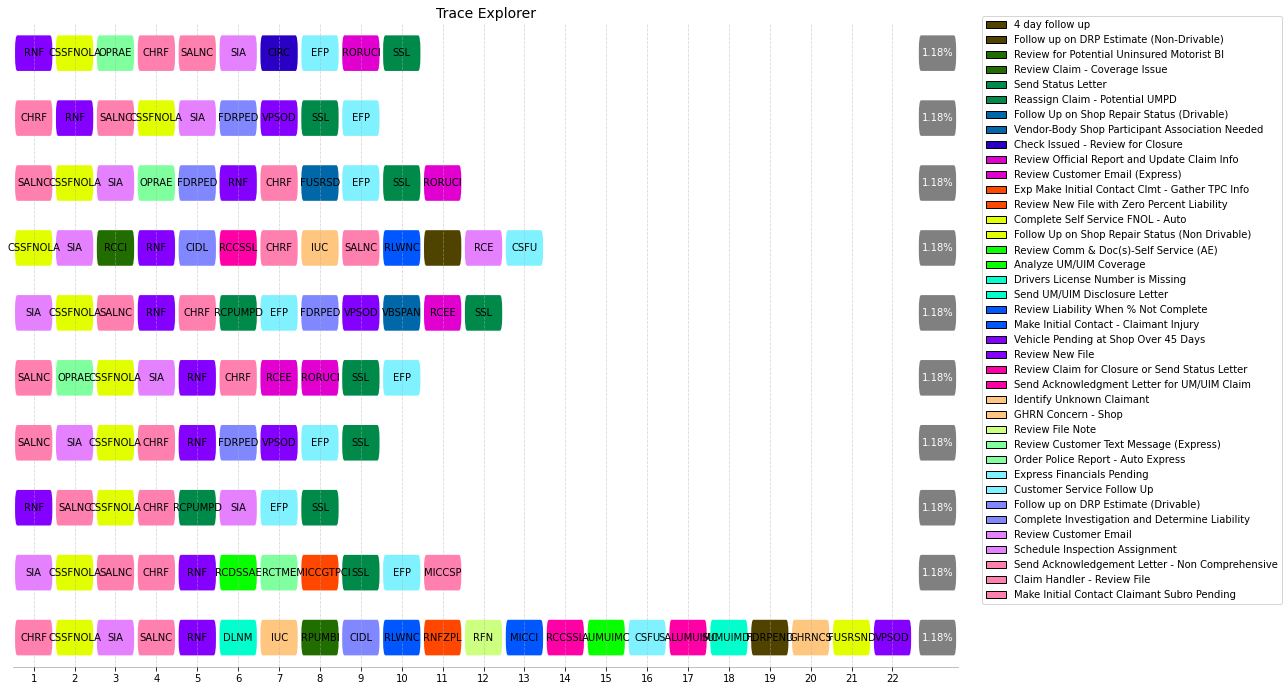

In [ ]:
dadict = plot_trace_explorer(df, 'CLAIM_ID', 'COMPLETION_DATE', 'TASK', ntraces=10, allow_duplicate_traces=False)

In [ ]:
# dadict

<h1><center> Trace Explorer - Plotly Implementation</center></h1>

In [ ]:
import plotly.express as px
import plotly.graph_objects as go


In [ ]:

def plotly_interactive_trace_explorer(data,
                                      case,
                                      create_dt,
                                      activity,
                                      ntraces=10,
                                      colors_hex_list=colors_hex_list,
                                      allow_duplicate_traces=False,
                                      fig_height=600,
                                      traces_acronym="Upper Case Characters",
                                      n_chars=8
                                      ):

    """
    Function to plot interactive trace explorer using plotly

    Params:
        data(dataframe)         : A pandas dataframe
        case(str)               : Unique case ID column name(Ex: Claims ID)
        create_dt(str)          : Activity create date column(Ex: Create Date)
        activity(str)           : Activity column name(Ex: Task)
        ntraces(int)            : Number traces to plot(rows), default 10
        colors_hex_list(list)   : List of hex colors
        allow_duplicate_traces  : A boolean to include/exculde duplicate traces in row
        fig_height(int)         : figure height
        traces_acronym(str)     : Generate acronym with the selection
                                    ["Upper Case Characters", "First N Characters",
                                    "First Character in Str"]
        n_chars(int)          : Number of characters


    Returns:
        None

        Displays a plotly interactive plot
    """


    df = data.copy()

    data_dict, color_map, acronym, _ = get_traces_from_df(df,
                                                          case,
                                                          create_dt,
                                                          activity,
                                                          ntraces=ntraces,
                                                          colors_hex_list=colors_hex_list,
                                                          allow_duplicate_traces=allow_duplicate_traces,
                                                          traces_acronym = traces_acronym,
                                                          n_chars=n_chars)


    check_legend_entry = {key:False for key in acronym.keys()}

    # Create a plotly figure
    fig = go.Figure()

    ## xaxis legnth is the number of categories + 1 for the percentage boxes
    xaxis_length = max([len(trace_list) for trace_list in data_dict['Trace']]) + 1
    width, height = 1, 1
    y_row_padding = width/4
    xaxis_padding = width/4

    ## draw out of the rectangles by iterating through each trace
    ## and plotting in coordinates starting from upper left to lower right
    ## the rectangles will be centered at (0,0), (1,0), ... (0,-1), (1,-1), ... ()
    for row_number, trace_list in enumerate(data_dict['Trace']):

        ## this will add y-padding between any boxes that aren't in the first row
        y_pos = (row_number-1)*(1+y_row_padding)
        for x_pos, name in enumerate(trace_list):

            ## check whether a legend entry has been created for a particular name
            ## to avoid duplicate legend entries for the same type of rectangle

            if check_legend_entry[name] == False:
                check_legend_entry[name] = True
                showlegend=True
            else:
                showlegend=False

            fig.add_trace(go.Scatter(
                x=[x_pos-width/2, x_pos+width/2, x_pos+width/2, x_pos-width/2, x_pos-width/2],
                y=[-y_pos-height/2, -y_pos-height/2, -y_pos+height/2, -y_pos+height/2, -y_pos-height/2],
                mode='lines',
                name=acronym[name],
                meta=[name],
                hovertemplate='%{meta[0]}<extra></extra>',
                # legendgroup=acronym[name],
                line=dict(color="black"),
                fill='toself',
                fillcolor=color_map[name],
                # showlegend=showlegend
            ))

            ## add the text in the center of each rectangle
            ## skip hoverinfo since the rectangle itself already has hoverinfo
            fig.add_trace(go.Scatter(
                x=[x_pos],
                y=[-y_pos],
                mode='text',
                # legendgroup=acronym[name],
                text=[name],
                hoverinfo='skip',
                textposition="middle center",
                showlegend=False
            ))

    ## add the percentage boxes
    for row_number, percentage in enumerate(data_dict['Percentage']):
        y_pos = (row_number-1)*(1+y_row_padding)
        x_pos = max([len(trace_list) for trace_list in data_dict['Trace']]) + width/4
        fig.add_trace(go.Scatter(
            x=[x_pos-width/2, x_pos+width/2, x_pos+width/2, x_pos-width/2, x_pos-width/2],
            y=[-y_pos-height/2, -y_pos-height/2, -y_pos+height/2, -y_pos+height/2, -y_pos-height/2],
            mode='lines',
            line=dict(width=0),
            fill='toself',
            fillcolor='darkgrey',
            name="Percentage",
            showlegend=False
        ))
        fig.add_trace(go.Scatter(
            x=[x_pos],
            y=[-y_pos],
            mode='text',
            text=[f"{percentage}%"],
            marker=dict(color="white"),
            hoverinfo='skip',
            textposition="middle center",
            showlegend=False
        ))

    ## prevent the axes from resizing if traces are removed
    fig.update_xaxes(range=[-width+xaxis_padding, xaxis_length-xaxis_padding])
    fig.update_layout(template='simple_white',
                    # Figure title styling
                    title= dict(
                        text="Trace Explorer",
                        x=0.5,
                        y=0.95,
                        font=dict(
                            family="Arial",
                            size=20,
                            color='#000000'
                            )
                        ),
                    # Fig height
                    height=fig_height,
                    # Turn off legend
                    showlegend=False,
                    hoverlabel=dict(
                        bgcolor="white",
                        font_size=16,
                        font_family="Rockwell"
                        )
                    )
    fig.update_yaxes(visible=False)
    fig.show()

    return data_dict

In [ ]:
df_dict = plotly_interactive_trace_explorer(df,
                                            'CLAIM_ID',
                                            'COMPLETION_DATE',
                                            'TASK',
                                            ntraces=10,
                                            colors_hex_list=colors_hex_list,
                                            allow_duplicate_traces=False,
                                            fig_height=600,
                                            traces_acronym="First Character in Str",
                                            n_chars=8)

# ["Upper Case Letters", "First N Character", "First Characters in Str"]